# Physics 256
## Relaxation Methods

<img src="https://cdn.lifehack.org/wp-content/uploads/2017/01/10094827/relax-05-e1484059717300.jpg" width=600px>


In [1]:
import style
style._set_css_style('../include/bootstrap.css')

## Last Time

### [Notebook Link: 23 Laplace](./23_Laplace.ipynb)


- Elliptical differential equations
- Spatial discretization and the Laplace equation
- Connection to the diffusion equation

## Today

- Relaxation methods including:
 - Jacobi method
 - Guass-Seidel method
 - Simultaneous over-relaxation
- Computing the electric field

## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Laplace's Equation

Recall that we were able to write the Laplace equation:

\begin{equation}
\nabla^2 V = 0
\end{equation}

on a three-dimensional grid (with isotropic grid size $\Delta x = \Delta y = \Delta z = \Delta$ as a difference equation that required that the value on each grid point be equal to the average of all its neighbors:

\begin{equation}
V(i,j,k) = \frac{1}{6} \left[V(i+1,j,k) + V(i-1,j,k) + V(i,j+1,k) + V(i,j-1,k) + V(i,j,k+1) + V(i,j,k-1) \right].
\end{equation}

If we assume that we have full translational symmetry in the $z$-direction, we can simply our problem to only two spatial dimensions, the $x-y$ plane and thus:

\begin{equation}
V(i,j) = \frac{1}{4} \left[V(i+1,j) + V(i-1,j) + V(i,j+1) + V(i,j-1)  \right].
\end{equation}

## Jacobi Method

Let's consider some pseudocode for an iterative solution to this equation.  We will require two arrays corresponding to the *old* and *new* iteration.  These can be swapped at every second iteration.

1. Initialze $V$ and $V'$ to some guessed configuration that obeys any boundary conditions
2. Perform an update: $V' \leftarrow V$ and compute the change per site $\Delta V = |V'-V|$.
3. Perform an update: $V \leftarrow V'$ and compute the change per site $\Delta V = |V'-V|$.
4. If we have converged based on the value of $\Delta V$ exit, othersise, go to 2.

## Potential in a box

Find the potential inside a hole in a metal box made of four plates held at potential $V = -1,0,+1,0$ as shown.

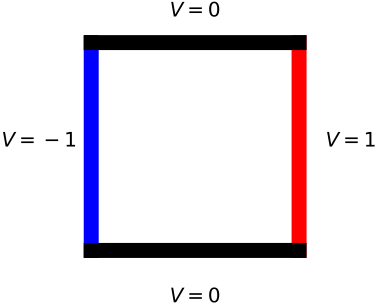

In [3]:
#plt.axis('off')
fig,ax = plt.subplots(1,1)
ax.plot((-1,-1),(-1,1),'b', lw=15)
ax.plot((1,1),(-1,1),'r', lw=15)
ax.plot((-1,1),(1,1),'k', lw=15)
ax.plot((-1,1),(-1,-1),'k', lw=15)

V = [-1,0,1,0]
for i,loc in enumerate([(-1.5,0),(0,-1.5),(1.5,0),(0,1.25)]):
    ax.text(*loc,r'$V=%d$'%V[i], fontsize=20, horizontalalignment='center')
ax.set_aspect('equal')
ax.axis('off');


### Step 1: Initialze the potential

In [4]:
def init(N):
    '''Initialize the potential with boundary conditions.'''

    # the potential
    V  = np.zeros([N,N])

    # set the boundary conditions 
    V[:,0] = -1.0
    V[:,-1] = 1.0
    
    # create the copy
    Vp = np.copy(V)

    return V,Vp

### Step 2: Perform the Jacobi update

In [5]:
def jacobi_update(V,Vp):
    '''Update the potential according to the Jacobi method.'''
    
    ΔV = 0.0
    for i in range(1,V.shape[0]-1):
        for j in range(1,V.shape[1]-1):
            Vp[i,j] = 0.25*(V[i-1,j] + V[i+1,j] + V[i,j+1] + V[i,j-1])
            ΔV += abs(Vp[i,j]-V[i,j])

    return ΔV

### Step 3: Iterate until convergence

In [ ]:
# the number of lattice points in the x and y direction
N = 50

# the tolerance for convergence
ϵ = 1.0E-5

# initialize 
V,Vp = init(N)

# Plot the initial configuration
fig = plt.figure(figsize=(8,5))
plt.title('Initial Configuration')
im = plt.imshow(1.0*V, extent=[-1,1,-1,1], cmap='bwr', rasterized=True)
plt.xlabel('x')
plt.ylabel('y')
cb = plt.colorbar(label='Electric Potential', pad=0.1)

# Iterate until convergence
n = 0
ΔV = 1.0

while ΔV/(N*N) > ϵ:
    ΔV = jacobi_update(V,Vp)
    ΔV += jacobi_update(Vp,V)
    n+= 1

# plot the final converged potential
fig = plt.figure(figsize=(8,5))
plt.title('Converged Potential')
im = plt.imshow(1.0*V, extent=[-1,1,-1,1], cmap='bwr', rasterized=True)
plt.xlabel('x')
plt.ylabel('y')
cb = plt.colorbar(label='Electric Potential', pad=0.1)

# plot equipotential lines
fig = plt.figure(figsize=(5,5))
X,Y = np.meshgrid(np.linspace(-1.0,1.0,N),np.linspace(-1.0,1.0,N))
cs = plt.contour(X,Y,V,20, cmap='bwr')
plt.xlabel('x')
plt.ylabel('y')
plt.clabel(cs, inline=1, fontsize=12)
plt.title('Equipotential Lines')

print("ΔV = %8.5E in %d steps" % ((ΔV/N**2),n))

### Visualizing the Relaxation

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

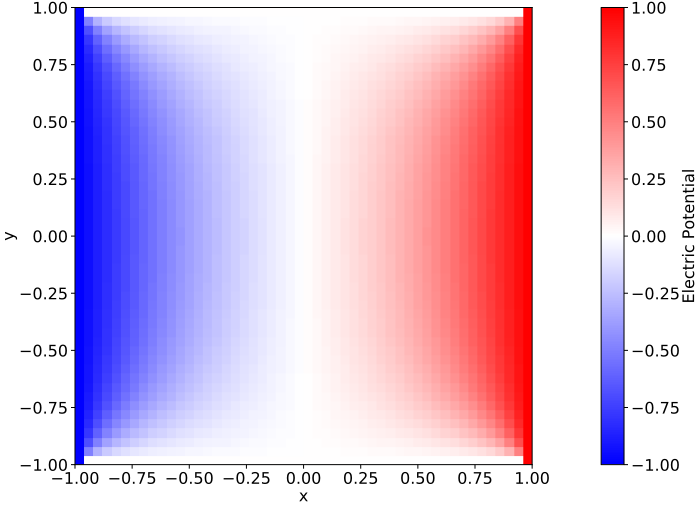

In [16]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

# initialize 
N = 50
V,Vp = init(N)

# Plot the initial configuration
fig = plt.figure(figsize=(12,8))
im = plt.imshow(V, extent=[-1,1,-1,1], cmap='bwr')
plt.xlabel('x')
plt.ylabel('y')
cb = plt.colorbar(label='Electric Potential', pad=0.1)
ims = [[plt.imshow(V, cmap=plt.get_cmap('bwr'), animated=True, rasterized=True)]]

# Iterate until convergence
n = 0
ΔV = 1.0
while ΔV/(N*N) > ϵ:
    ΔV = jacobi_update(V,Vp)
    ΔV += jacobi_update(Vp,V)
    
    # plot the intermediate results
    if n < 200 and not n%2:
        ims.append([plt.imshow(V, extent=[-1,1,-1,1], cmap=plt.get_cmap('bwr'), animated=True, rasterized=True)]);
    print('.',end='')    
    n+= 1

# animate the final result
anim = animation.ArtistAnimation(fig, ims, interval=10);

In [ ]:
anim

## The Electric Field

We can determine the electric field $\vec{E}$ via: 

\begin{equation}
\vec{E} = -\nabla V
\end{equation}

using our discrete centered approximation for the derivative in the $x$ and $y$ direction:

\begin{align}
E_x(i,j) &= - \frac{V(i,j+1) - V(i,j-1)}{2 \Delta y} \newline
E_y(i,j) &= - \frac{V(i+1,j) - V(i-1,j)}{2 \Delta x}
\end{align}

<br />
<div class="span alert alert-danger">
Note the distinction between what we consider as $x$ and $y$ and the rows and columns of the matrix $V$.
</div>

In [22]:
def getE(V):
    '''Compute the electric field using a centered derivative for an isotropic discretization
       equal to 1.'''

    # initialize the E-Field arrays    
    Ex = np.zeros(V.shape)
    Ey = np.zeros_like(Ex)

    #Compute the electric field as the gradient of the potential
    for i in range(1,V.shape[0]-1):
        for j in range(1,V.shape[1]-1):
            Ex[i,j] = -0.5*(V[i,j+1]-V[i,j-1])
            Ey[i,j] = -0.5*(V[i+1,j]-V[i-1,j])

    # Return the electric field
    return Ex,Ey

Text(0.5, 1.0, 'Electric Field')

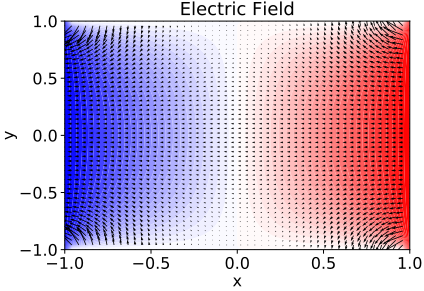

In [24]:
Ex,Ey = getE(V)
X,Y = np.meshgrid(np.linspace(-1.0,1.0,N),np.linspace(-1.0,1.0,N))
plt.contourf(X,Y,V,50, cmap='bwr')
plt.quiver(X,Y,Ex,Ey)
plt.axis([-1.0,1.0,-1.0,1.0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Field')

## Scaling and Speedup

As we have seen, relaxation algorithms scale poorly with the system size, $O(N^d)$ where $N$ is the number of grid points in each dimension.  We an make a simple change analogous to the Euler-Cromer method to obtain a constant speedup factor of 2 by simply using the new values of the potential as they become available.  This is known as the **Gauss-Seidel** method and also allows us to only use a single array.

In [25]:
def gauss_seidel_update(V):
    '''Update the potential according to the Gauss-Seidel method.'''

    ΔV = 0.0
    for i in range(1,V.shape[0]-1):
        for j in range(1,V.shape[1]-1):
            V_old = V[i,j]
            V[i,j] = 0.25*(V[i-1,j] + V[i+1,j] + V[i,j+1] + V[i,j-1])
            ΔV += abs(V_old - V[i,j])

    return ΔV


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

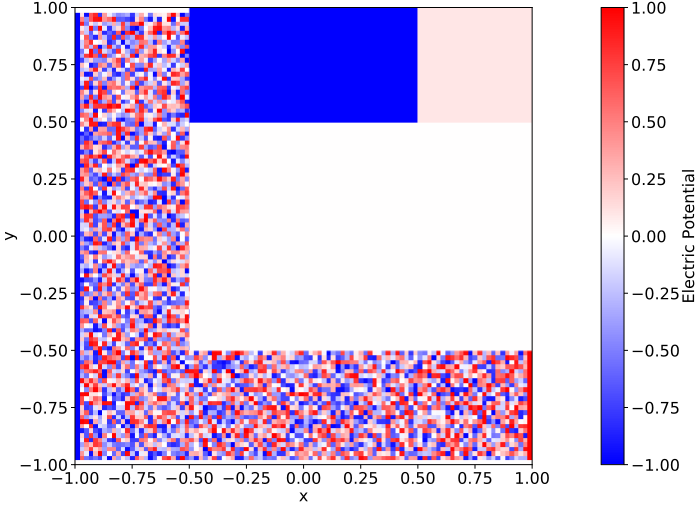

In [26]:
# initialize 
N = 100
ϵ = 1.0E-5
V = -1 + 2.0*np.random.random([N,N])
V[:,0] = -1.0
V[:,-1] = 1.0
V[0,:] = 0.0
V[-1,:] = 0.0

# Plot the initial configuration
fig = plt.figure(figsize=(12,8))
im = plt.imshow(V, extent=[-1,1,-1,1], cmap='bwr')
plt.xlabel('x')
plt.ylabel('y')
cb = plt.colorbar(label='Electric Potential', pad=0.1)
ims = [[plt.imshow(V, cmap=plt.get_cmap('bwr'), animated=True, origin='lower', rasterized=True)]]

# Iterate until convergence
n = 0
ΔV = 1.0
while ΔV/(N*N) > ϵ:
    ΔV = gauss_seidel_update(V)
    
    # plot the intermediate results
    if n < 500 and not n%2:
        ims.append([plt.imshow(V, extent=[-1,1,-1,1], cmap=plt.get_cmap('bwr'), animated=True, 
                               origin='lower', interpolation='None', rasterized=True)])
    n+= 1
    print('.',end='')

# animate the final result
anim = animation.ArtistAnimation(fig, ims, interval=10, blit=False, repeat_delay=1, repeat=True)
print("\nΔV = %8.5E in %d steps" % ((ΔV/N**2),n))

### This is better but still slow.  There must be a better way!

In [27]:
anim

KeyboardInterrupt: 